In [83]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.dates as mdates
%matplotlib inline

In [84]:
years = range(2000,2015)

pieces = []
columns = ['When Reported','Offense Code','location']

for year in years:
    path = 'C:/Users/flunk_000/Desktop/CalPoly/StakeOut/%d.csv' % year
    frame = pd.read_csv(path, names=columns, header = True)

    pieces.append(frame)

crimeData = pd.concat(pieces, ignore_index=True)

#Total Crime/Day

In [85]:
for i in range(len(crimeData['location'])):
    if crimeData['location'][i] == 'LZ1':
        crimeData['location'][i]=1
    if crimeData['location'][i] =='LZ2':
        crimeData['location'][i]=2
    if crimeData['location'][i]=='LZ3':
        crimeData['location'][i]=3

In [86]:
crimeData['When Reported'] = [datetime.datetime.strptime(date, '%H:%M:%S %m/%d/%Y') for date in crimeData['When Reported']]

In [87]:
crimeData['When Reported'] = sorted(crimeData['When Reported'])

In [88]:
ts = pd.Series(crimeData['location'],index=crimeData['When Reported'])
ts[0:] = 1

In [89]:
byDay = ts.resample('D',how='sum')

# Total Crime/Day, by Zone 

In [90]:
z1 = crimeData.query('location == 1')
z2 = crimeData.query('location == 2')
z3 = crimeData.query('location == 3')

In [91]:
print('Total crime for zone 1:',len(z1));print('Total crime for zone 2:',len(z2));print('Total crime for zone 3:',(len(z3)))

('Total crime for zone 1:', 167318)
('Total crime for zone 2:', 176247)
('Total crime for zone 3:', 75107)


In [92]:
z1 = z1.reset_index();
z2 = z2.reset_index();
z3 = z3.reset_index();

In [93]:
del z1['index']
del z2['index']
del z3['index']

In [94]:
z1TS = pd.Series(z1['location'],index=z1['When Reported'])
z1TS[0:] = 1

z2TS = pd.Series(z1['location'],index=z2['When Reported'])
z2TS[0:] = 1

z3TS = pd.Series(z1['location'],index=z3['When Reported'])
z3TS[0:] = 1

In [95]:
z1TS = z1TS.resample('D',how='sum')
z2TS = z2TS.resample('D',how='sum')
z3TS = z3TS.resample('D',how='sum')

In [96]:
z1mean = round(np.mean(z1TS),2)
z1std = round(np.std(z1TS),2)

z2mean = round(np.mean(z2TS),2)
z2std = round(np.std(z2TS),2)

z3mean = round(np.mean(z3TS),2)
z3std = round(np.std(z3TS),2)

## Crime by Zone: Visualization

In [97]:
from matplotlib.gridspec import GridSpec

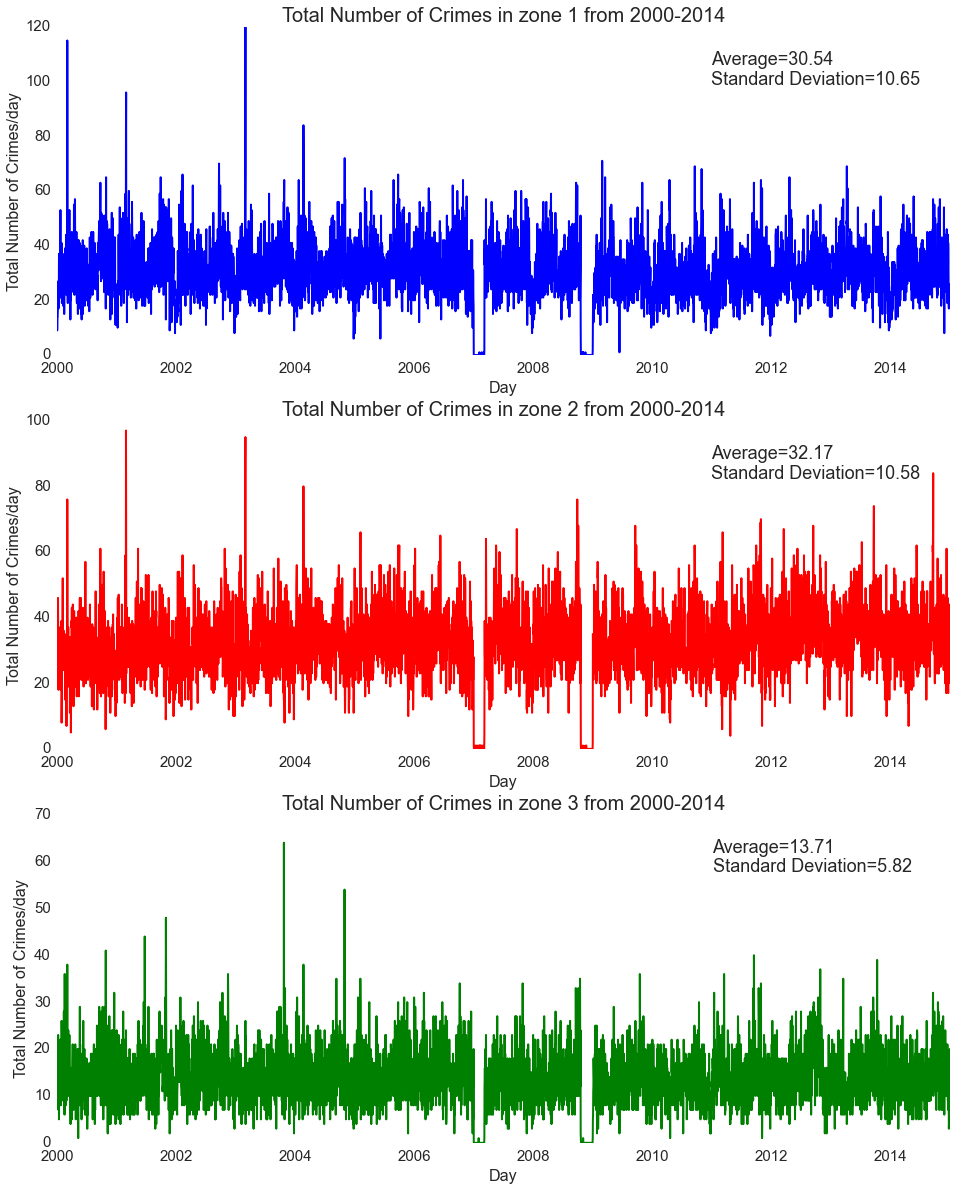

In [98]:
figure = plt.figure(figsize=(16,20))
gs = GridSpec(3,1)

z1plot = figure.add_subplot(gs[0,0])
z1plot =z1TS.plot(linewidth=2, c='blue')
z1plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z1plot.set_xlabel('Day',fontsize=16)
z1plot.set_title('Total Number of Crimes in zone 1 from 2000-2014',fontsize=20)
z1plot.tick_params(axis='both', labelsize=15)
z1plot.text(0.8, 0.9,'Average=%.2f' %z1mean, ha='center', va='center', transform=z1plot.transAxes, fontsize = 18)
z1plot.text(0.849, 0.84,'Standard Deviation=%.2f' %z1std, ha='center', va='center', transform=z1plot.transAxes, fontsize = 18);

z2plot = figure.add_subplot(gs[1,0])
z2plot = z2TS.plot(linewidth=2, c='red')
z2plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z2plot.set_xlabel('Day',fontsize=16)
z2plot.set_title('Total Number of Crimes in zone 2 from 2000-2014',fontsize=20)
z2plot.tick_params(axis='both', labelsize=15)
z2plot.text(0.8, 0.9,'Average=%.2f' %z2mean, ha='center', va='center', transform=z2plot.transAxes, fontsize = 18)
z2plot.text(0.849, 0.84,'Standard Deviation=%.2f' %z2std, ha='center', va='center', transform=z2plot.transAxes, fontsize = 18);

z3plot = figure.add_subplot(gs[2,0])
z3plot = z3TS.plot(linewidth=2, c='green')
z3plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z3plot.set_xlabel('Day',fontsize=16)
z3plot.set_title('Total Number of Crimes in zone 3 from 2000-2014',fontsize=20)
z3plot.tick_params(axis='both', labelsize=15)
z3plot.text(0.8, 0.9,'Average=%.2f' %z3mean, ha='center', va='center', transform=z3plot.transAxes, fontsize = 18)
z3plot.text(0.846, 0.84,'Standard Deviation=%.2f' %z3std, ha='center', va='center', transform=z3plot.transAxes, fontsize = 18);

##Crime by Zone: Harmonic Model 

In [99]:
def imabs(complexNum):
    return 2*abs(complexNum)/float(2048)

def imarg(complexNum):
    return math.atan2(complexNum.imag,complexNum.real)

def sine_wave(time,amp,freq,phi,damp):
    return ((math.exp(-1*damp*time))*
            (amp*math.cos(2*math.pi*freq*time+phi)))

In [100]:
ffts = {'1stWindow': np.fft.fft(z3TS[3431:5479])}

In [101]:
harmonicDF = pd.DataFrame(ffts)

In [102]:
harmonicDF['peakAmp1']= harmonicDF.apply(lambda row: imabs(row['1stWindow']), axis=1)

In [103]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [104]:
harmonicDF['peakAmp1'][0] = 0
harmonicDF['peakAmp1'][1023] = abs(harmonicDF['1stWindow'][1023])

In [105]:
harmonicDF['k'] = np.arange(len(harmonicDF))

In [106]:
harmonicDF['freq'] = harmonicDF['k']/float(2048)

In [107]:
harmonicDF['phase(rad)1']= harmonicDF.apply(lambda row: imarg(row['1stWindow']), axis=1)

In [108]:
peakDF = harmonicDF.filter(regex='peakAmp1')

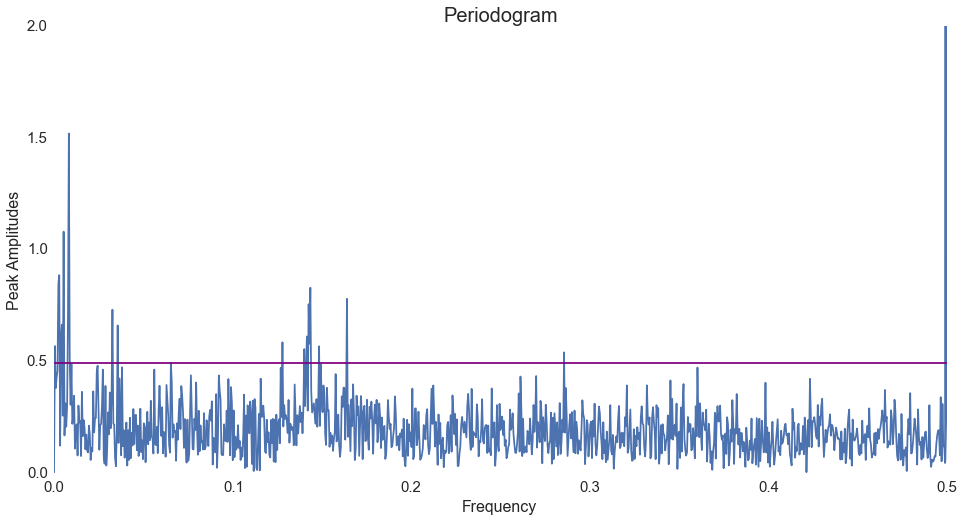

In [109]:
figure = plt.figure(figsize = (16,8))
plt.plot(harmonicDF['freq'], harmonicDF['peakAmp1'])
plt.ylim(0,2)
plt.xlim(0,.5)
plt.axhline(.49,0, color='purple')
plt.ylabel('Peak Amplitudes', fontsize = 16)
plt.xlabel('Frequency', fontsize = 16)
plt.tick_params(axis='both', labelsize=15)
plt.title('Periodogram', fontsize = 20);

In [110]:
index = pd.date_range('2000-01-01', periods=5479, freq='D')
waveDF = pd.DataFrame(mdates.date2num(index), columns=['time'])
waveDF['When Reported'] = index

In [111]:
peakDFsorted = peakDF.sort(['peakAmp1'],ascending=False);
amp1st = peakDFsorted['peakAmp1'][1:43]

In [112]:
amp1st

2031    1.519990
17      1.519990
2037    1.080406
11      1.080406
6       0.885278
2042    0.885278
2043    0.845896
5       0.845896
294     0.829268
1754    0.829268
336     0.779341
1712    0.779341
1756    0.755360
292     0.755360
1981    0.730795
67      0.730795
2032    0.692750
16      0.692750
9       0.663765
2039    0.663765
1975    0.660236
73      0.660236
1758    0.610812
290     0.610812
2040    0.609741
8       0.609741
1786    0.584530
262     0.584530
1755    0.578668
293     0.578668
2047    0.567981
1       0.567981
1744    0.566858
304     0.566858
1761    0.554237
287     0.554237
1463    0.539493
585     0.539493
18      0.505990
2030    0.505990
1914    0.492418
134     0.492418
Name: peakAmp1, dtype: float64

In [113]:
periods = []
for i in [17,11,6,5,294,336,292,67,16,9,73,8,262,293,304,287,585,18,134]:
    periods.append(1/harmonicDF['freq'][i])
periods

[120.47058823529412,
 186.18181818181819,
 341.33333333333331,
 409.60000000000002,
 6.9659863945578229,
 6.0952380952380949,
 7.0136986301369859,
 30.567164179104477,
 128.0,
 227.55555555555554,
 28.054794520547944,
 256.0,
 7.8167938931297707,
 6.9897610921501707,
 6.7368421052631575,
 7.1358885017421603,
 3.5008547008547009,
 113.77777777777777,
 15.283582089552239]

In [114]:
indices = [17,11,6,5,294,336,292,67,16,9,73,8,262,293,304,287,585,18,134]
k=1

for j in range(len(indices)):
    amp = harmonicDF['peakAmp1'][indices[j]]
    freq = harmonicDF['freq'][indices[j]]
    phi = harmonicDF['phase(rad)1'][indices[j]]
    damp=0
    
    waveDF['SineValues%d' %int(k)]= waveDF.apply(lambda row: sine_wave(row['time'],amp,freq,phi, damp),axis=1)
    k+=1

In [115]:
interval1 = waveDF.copy()

In [116]:
del interval1['time']
del interval1['When Reported']

In [117]:
waveDF['agWave'] = (interval1.sum(axis=1))

In [118]:
wave1 = pd.Series(waveDF['agWave'],index=waveDF['When Reported'])
wave1[0:] = waveDF['agWave']+np.mean(z3TS[3431:5497])

In [119]:
wave2 = wave1[3431:5497]

In [120]:
z3TS2 = z3TS[3431:5497]

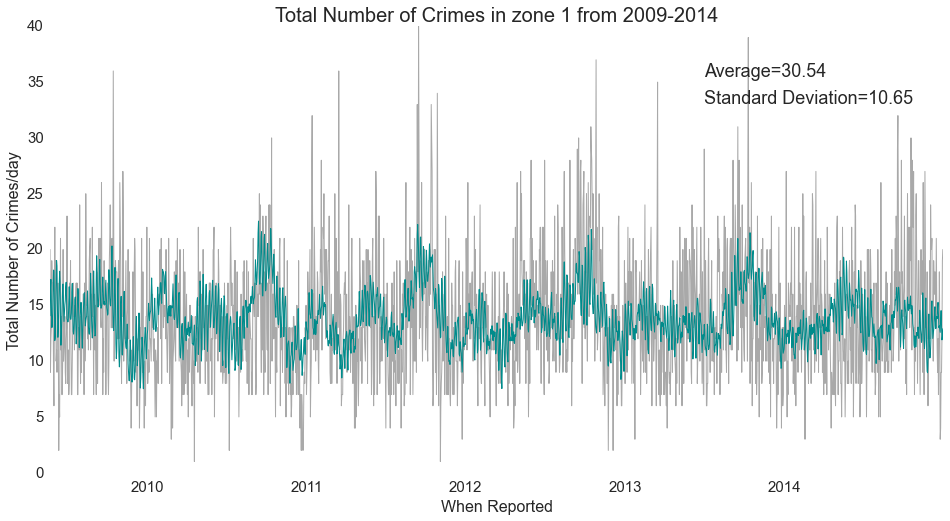

In [121]:
figure = plt.figure(figsize=(16,8))
z1plot =z3TS2.plot(linewidth=1, c='darkgray')
z1plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z1plot.set_xlabel('Day',fontsize=16)
z1plot.set_title('Total Number of Crimes in zone 1 from 2009-2014',fontsize=20)
z1plot.tick_params(axis='both', labelsize=15)
z1plot.text(0.8, 0.9,'Average=%.2f' %z1mean, ha='center', va='center', transform=z1plot.transAxes, fontsize = 18)
z1plot.text(0.849, 0.84,'Standard Deviation=%.2f' %z1std, ha='center', va='center', transform=z1plot.transAxes, fontsize = 18);

wave2.plot(linewidth=1,c='darkcyan');

In [122]:
waveDF.to_csv('C:/Users/flunk_000/Desktop/CalPoly/StakeOut/zone3.csv')

In [123]:
forecastRange = 2048+365

In [124]:
index = pd.date_range('2009-05-24', periods=forecastRange, freq='D')
forecastDF = pd.DataFrame(mdates.date2num(index), columns=['time'])
forecastDF['When Reported'] = index

In [125]:
indices = [17,11,6,5,294,336,292,67,16,9,73,8,262,293,304,287,585,18,134]
k=1

for j in range(len(indices)):
    amp = harmonicDF['peakAmp1'][indices[j]]
    freq = harmonicDF['freq'][indices[j]]
    phi = harmonicDF['phase(rad)1'][indices[j]]
    damp=0
    
    forecastDF['SineValues%d' %int(k)]= forecastDF.apply(lambda row: sine_wave(row['time'],amp,freq,phi, damp),axis=1)
    k+=1

In [126]:
forecastInterval = forecastDF.copy()

In [127]:
del forecastInterval['time']
del forecastInterval['When Reported']

In [128]:
forecastDF['agWave'] = (forecastInterval.sum(axis=1))

In [129]:
len(forecastDF)-365

2048

In [130]:
forecastDF

,time,When Reported,SineValues1,SineValues2,SineValues3,SineValues4,SineValues5,SineValues6,SineValues7,SineValues8,...,SineValues11,SineValues12,SineValues13,SineValues14,SineValues15,SineValues16,SineValues17,SineValues18,SineValues19,agWave
0,733551,2009-05-24,0.979125,-0.870636,-0.868732,0.839332,-0.256387,-0.742260,0.633355,-0.729963,...,0.315149,0.120224,0.435446,-0.446693,0.255199,0.551160,-0.519984,-0.186727,0.143385,0.190265
1,733552,2009-05-25,1.038403,-0.891726,-0.865449,0.840847,0.459758,-0.177859,0.717125,-0.721709,...,0.436129,0.134858,0.021420,0.009858,0.558576,0.305993,-0.024691,-0.160485,0.319693,2.518675
2,733553,2009-05-26,1.094857,-0.911801,-0.861872,0.842164,0.826539,0.559384,0.262849,-0.683068,...,0.535326,0.149410,-0.405716,0.458965,0.410287,-0.161471,0.530952,-0.133754,0.442727,3.451933
3,733554,2009-05-27,1.148333,-0.930837,-0.858004,0.843282,0.565245,0.753021,-0.388637,-0.615667,...,0.607783,0.163873,-0.584530,0.561518,-0.069760,-0.511630,-0.211151,-0.106615,0.491983,1.332213
4,733555,2009-05-28,1.198687,-0.948813,-0.853845,0.844202,-0.125570,0.214876,-0.748536,-0.522345,...,0.649881,0.178237,-0.405579,0.240082,-0.493400,-0.490102,-0.437161,-0.079152,0.459255,-0.867724
5,733556,2009-05-29,1.245780,-0.965708,-0.849397,0.844924,-0.720967,-0.532084,-0.546823,-0.407030,...,0.659519,0.192493,0.021610,-0.262635,-0.518076,-0.112526,0.405332,-0.051447,0.349996,-0.818152
6,733557,2009-05-30,1.289486,-0.981504,-0.844661,0.845446,-0.768511,-0.761968,0.065161,-0.274577,...,0.636214,0.206634,0.435572,-0.567042,-0.123835,0.346797,0.257118,-0.023585,0.182412,0.325220
7,733558,2009-05-31,1.329684,-0.996182,-0.839638,0.845770,-0.232075,-0.251376,0.628256,-0.130564,...,0.581131,0.220650,0.582940,-0.443288,0.370539,0.554180,-0.519541,0.004349,-0.015568,2.072425
8,733559,2009-06-01,1.366267,-1.009726,-0.834331,0.845895,0.480712,0.503502,0.719982,0.018947,...,0.497020,0.234533,0.373515,0.015183,0.565294,0.358965,-0.026345,0.032270,-0.210955,4.290974
9,733560,2009-06-02,1.399134,-1.022119,-0.828742,0.845820,0.828212,0.769080,0.271519,0.167659,...,0.388084,0.248275,-0.064523,0.462190,0.302952,-0.097030,0.531243,0.060092,-0.371187,4.228056


In [131]:
forecastDF.to_csv('C:/Users/flunk_000/Desktop/CalPoly/StakeOut/zone3Forecast.csv')